## Problem Statement
A US-based housing company has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The company is looking at prospective properties to buy to enter the market.

 
## Business Goals
Build a regression model in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
The company wants to know:
 1. Which variables are significant in predicting the price of a house, and
 2. How well those variables describe the price of a house.

This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
#import basic libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 1. Data understanding and exploration

In [2]:
#read csv
housing = pd.read_csv('australia_housing.csv')

In [3]:
housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
#datatype and non-null values
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#change numeric variable to categorical
housing[['MSSubClass', 'OverallQual', 'OverallCond']] = housing[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [6]:
#check null values
housing.isna().sum().sort_values(ascending=False).head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

In [7]:
#As per data dictionary, NaN in all variables means 'Not available'.
housing_objects = housing.select_dtypes(include=['object']).replace(np.nan, 'None')
housing_numerics = housing.select_dtypes(include=['int64', 'float64']).replace(np.nan, 0)
housing = pd.concat([housing_objects, housing_numerics], axis=1)
housing.shape

(1460, 81)

### 2. Univariate and Bivariate analysis

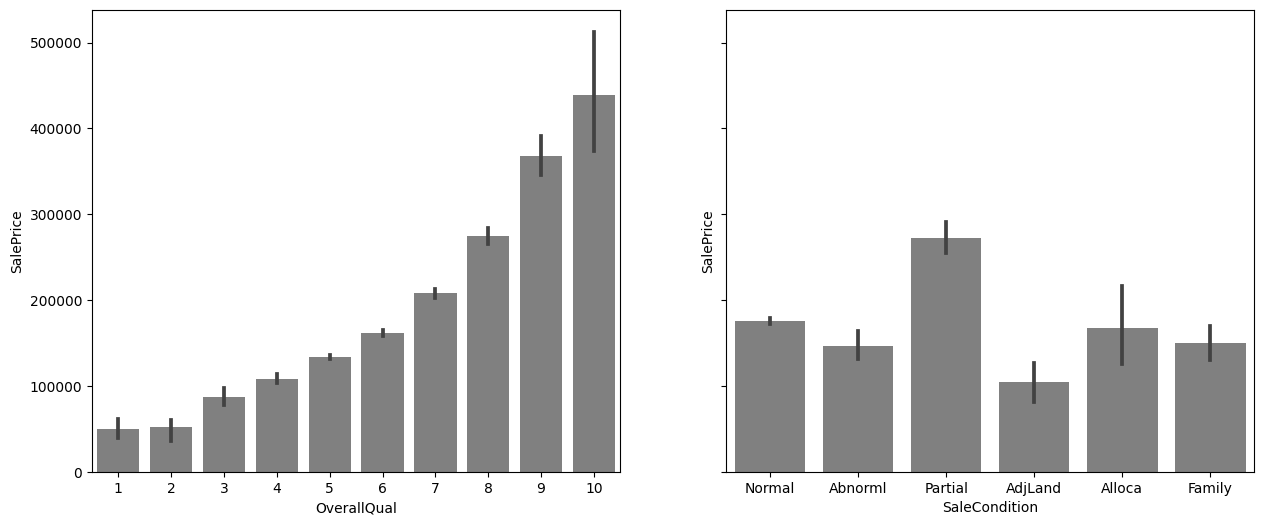

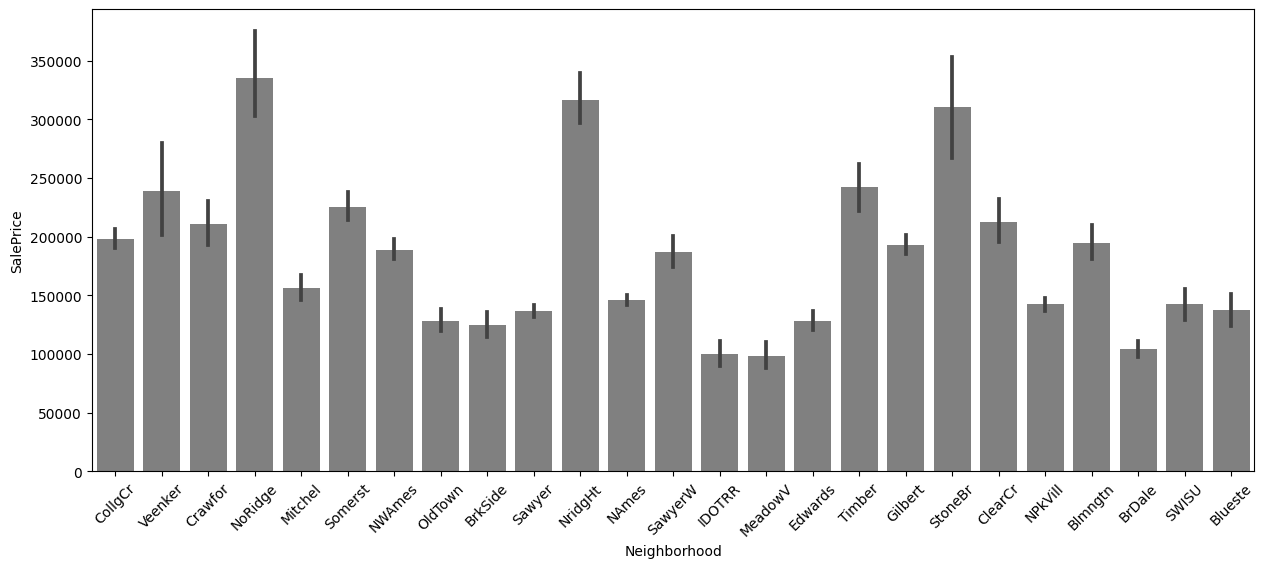

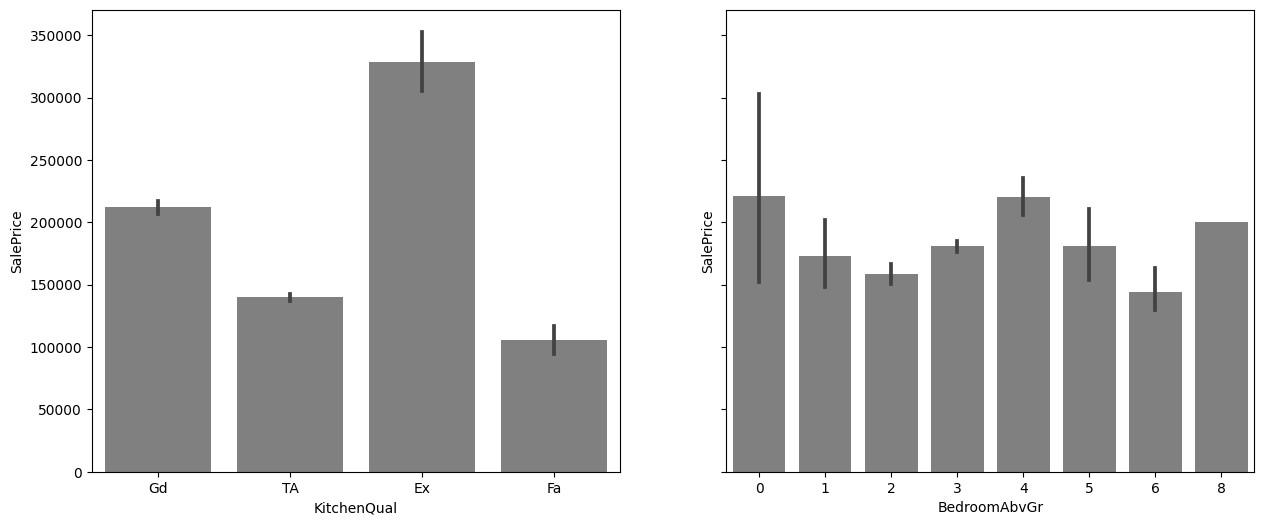

In [8]:
# relationship with sale price 
fig, ax = plt.subplots(1,2, figsize=(15, 6), sharey=True)
sns.barplot(x = 'OverallQual', y = 'SalePrice', data=housing, ax=ax[0], color='grey')
sns.barplot(x = 'SaleCondition', y = 'SalePrice', data=housing, ax=ax[1], color = 'grey')
plt.show()


plt.figure(figsize = (15,6))
sns.barplot(x = 'Neighborhood', y = 'SalePrice', data=housing, color = 'grey')
plt.xticks(rotation=45)
plt.show()

fig, ax = plt.subplots(1,2, figsize=(15, 6), sharey=True)
sns.barplot(x = 'KitchenQual', y = 'SalePrice', data=housing, ax = ax[0], color = 'grey')
sns.barplot(x = 'BedroomAbvGr', y = 'SalePrice', data=housing, ax = ax[1], color = 'grey')
plt.show()

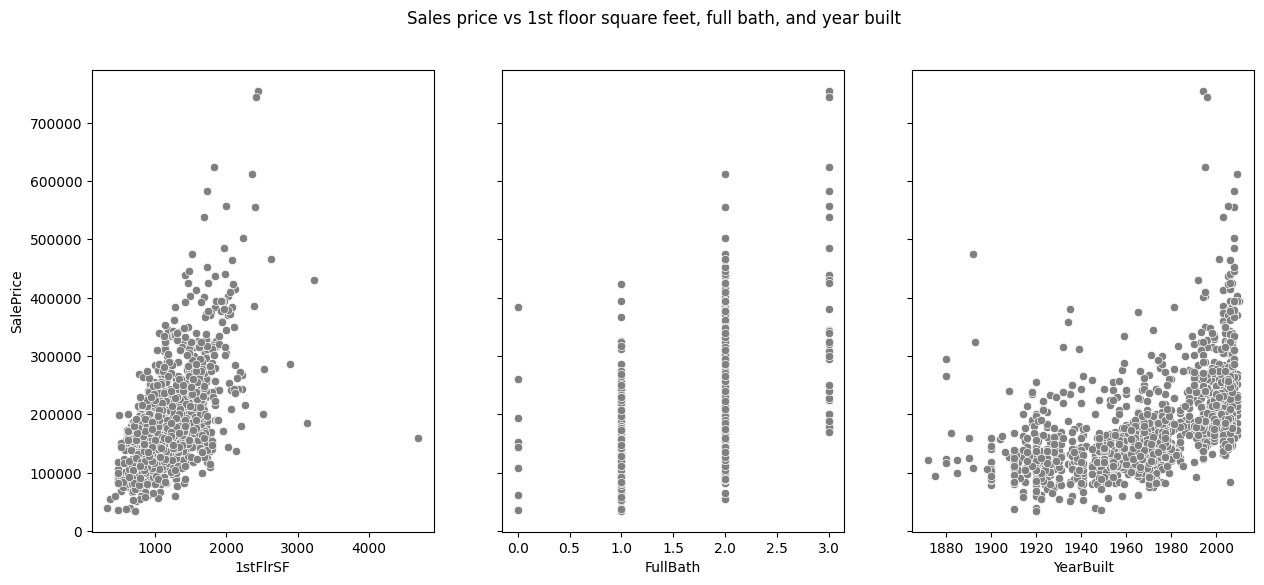

In [9]:
#correlation with sales price
fig, ax = plt.subplots(1,3, figsize=(15, 6), sharey=True)
sns.scatterplot(x='1stFlrSF', y='SalePrice', data = housing, ax=ax[0], color='grey')
sns.scatterplot(x='FullBath', y='SalePrice', data = housing, ax=ax[1], color='grey')
sns.scatterplot(x='YearBuilt', y='SalePrice', data = housing, ax=ax[2], color='grey')
plt.suptitle("Sales price vs 1st floor square feet, full bath, and year built")
plt.show()

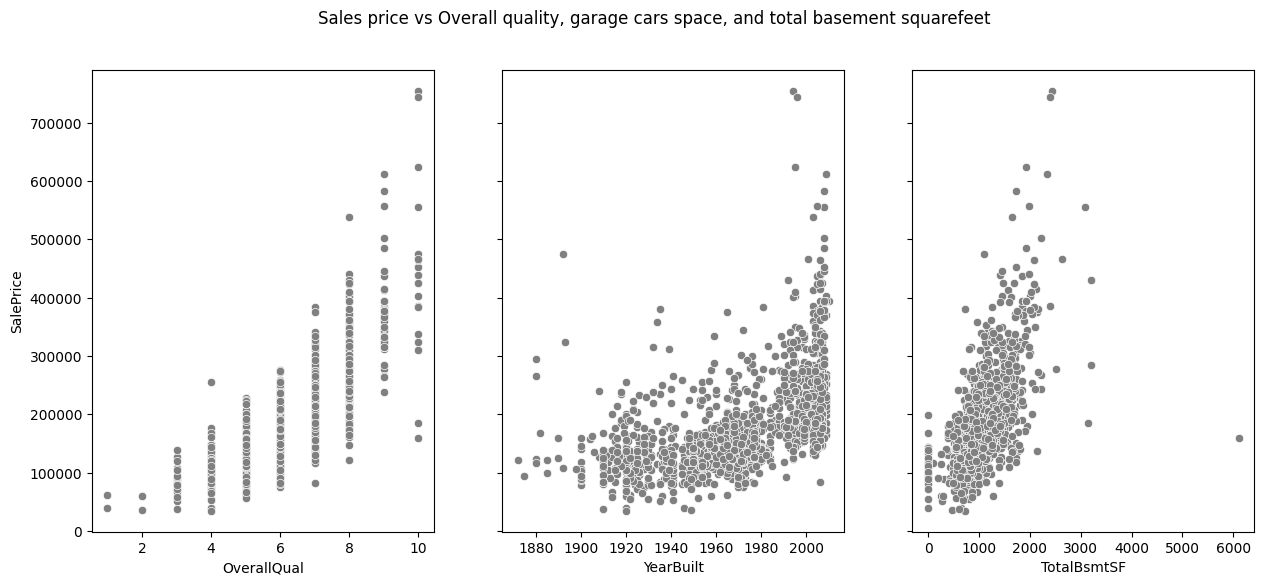

In [10]:
#correlation with sales price
fig, ax = plt.subplots(1,3, figsize=(15, 6), sharey=True)
sns.scatterplot(x='OverallQual', y='SalePrice', data = housing, ax=ax[0], color='grey')
sns.scatterplot(x='YearBuilt', y='SalePrice', data = housing, ax=ax[1], color='grey')
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data = housing, ax=ax[2], color='grey')
plt.suptitle("Sales price vs Overall quality, garage cars space, and total basement squarefeet")
plt.show()

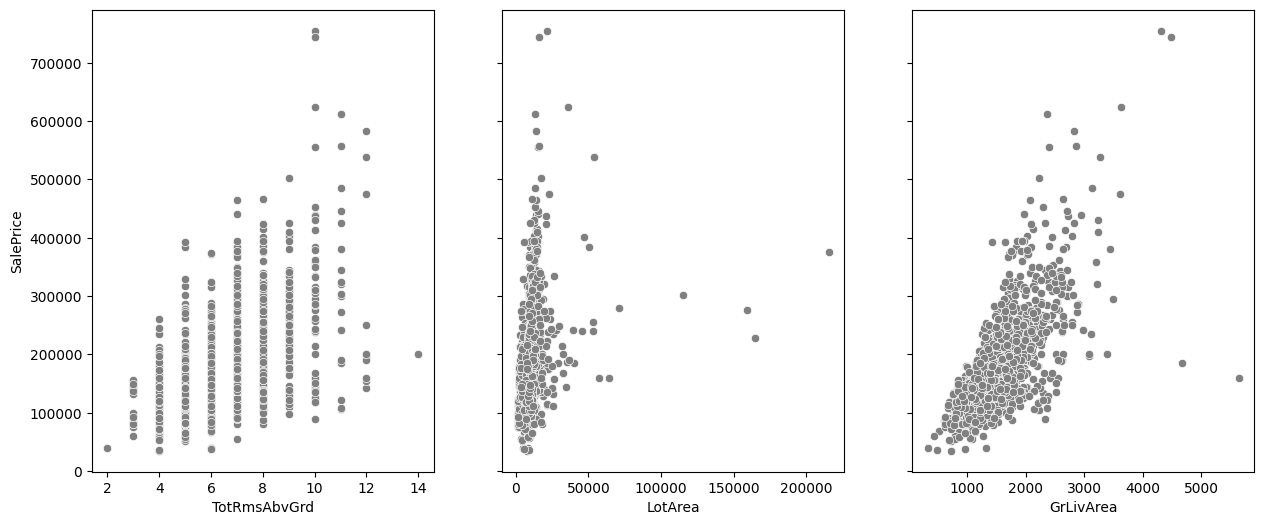

In [11]:
#correlation with sales price
fig, ax = plt.subplots(1,3, figsize=(15, 6), sharey=True)
sns.scatterplot(x='TotRmsAbvGrd', y='SalePrice', data = housing, ax=ax[0], color='grey')
sns.scatterplot(x='LotArea', y='SalePrice', data = housing, ax=ax[1], color='grey')
sns.scatterplot(x='GrLivArea', y='SalePrice', data = housing, ax=ax[2], color='grey')
plt.show()

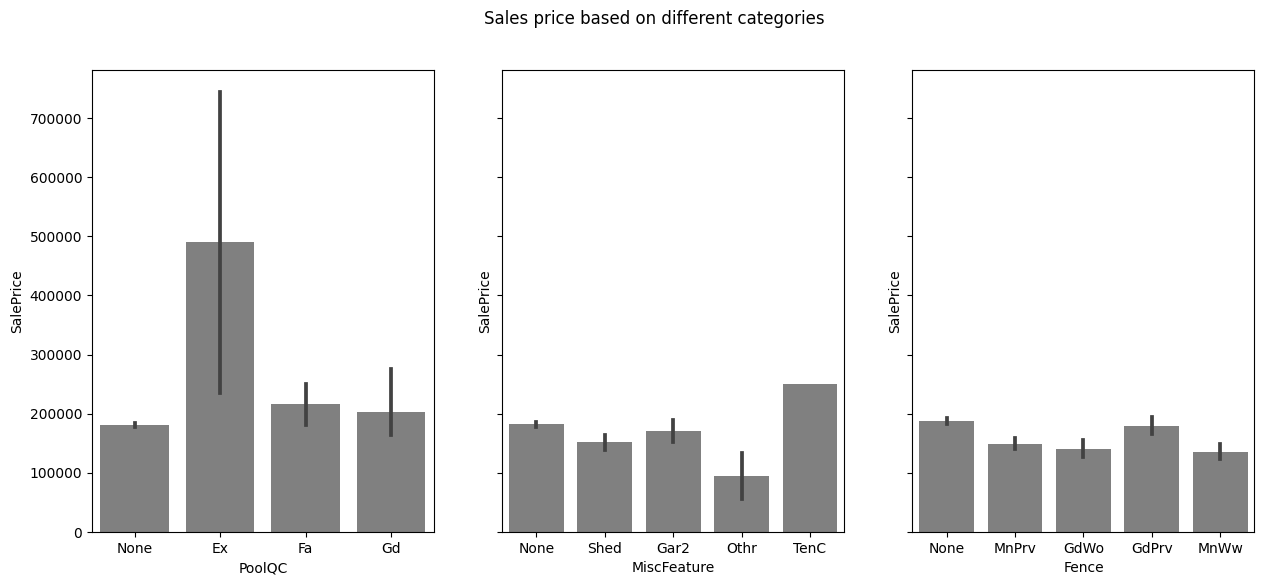

In [12]:
fig, ax = plt.subplots(1,3, figsize=(15, 6), sharey=True)
sns.barplot(data=housing, x="PoolQC", y= "SalePrice", ax=ax[0], color='grey')
sns.barplot(data=housing, x="MiscFeature", y= "SalePrice", ax=ax[1], color='grey')
sns.barplot(data=housing, x="Fence", y= "SalePrice", ax=ax[2], color='grey')
plt.suptitle('Sales price based on different categories')
plt.show()

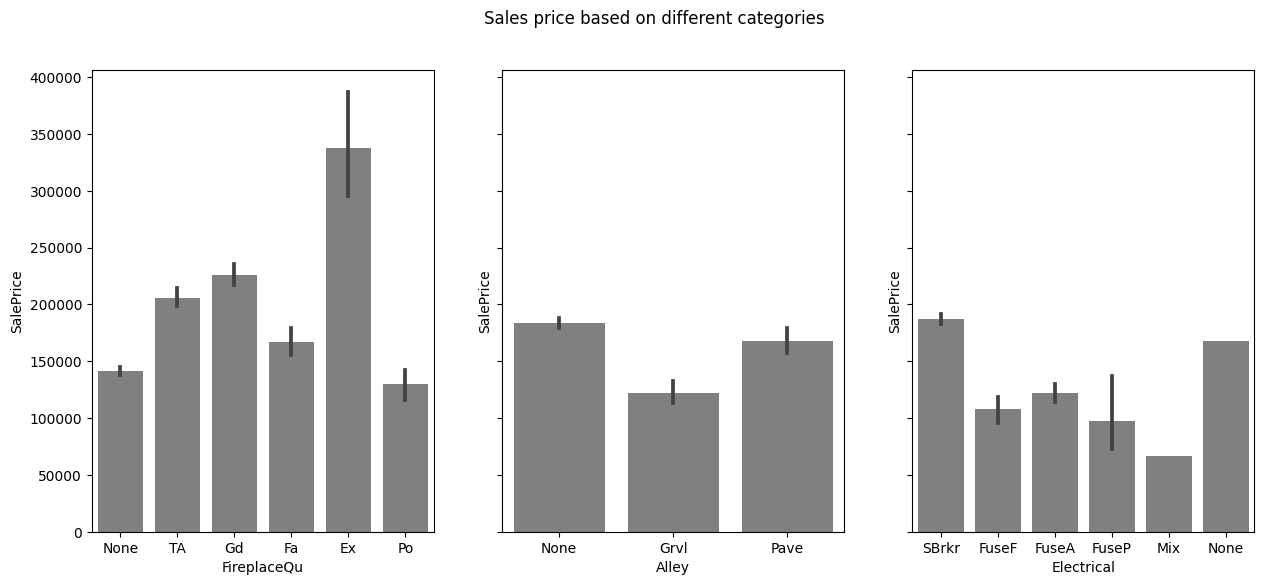

In [13]:
fig, ax = plt.subplots(1,3, figsize=(15, 6), sharey=True)
sns.barplot(data=housing, x="FireplaceQu", y= "SalePrice", ax=ax[0], color='grey')
sns.barplot(data=housing, x="Alley", y= "SalePrice", ax=ax[1], color='grey')
sns.barplot(data=housing, x="Electrical", y= "SalePrice", ax=ax[2], color='grey')
plt.suptitle('Sales price based on different categories')
plt.show()

### 3. Feature selection

In [14]:
#shape before removing outliers
housing.shape

(1460, 81)

In [15]:
#define a function to remove extreme values

def remove_outliers(df):
    df = df[(df.TotRmsAbvGrd < 14) & (df.TotRmsAbvGrd >2) & (df.LotArea < 100000) & (df.GrLivArea < 4000)]
    return df

In [16]:
#remove extreme values 
housing = remove_outliers(housing)

#shape after removing outliers
housing.shape

(1450, 81)

In [17]:
#check duplicate rows
housing.duplicated().sum()

0

In [18]:
#setting id as index
housing = housing.drop(['Id'], axis=1)

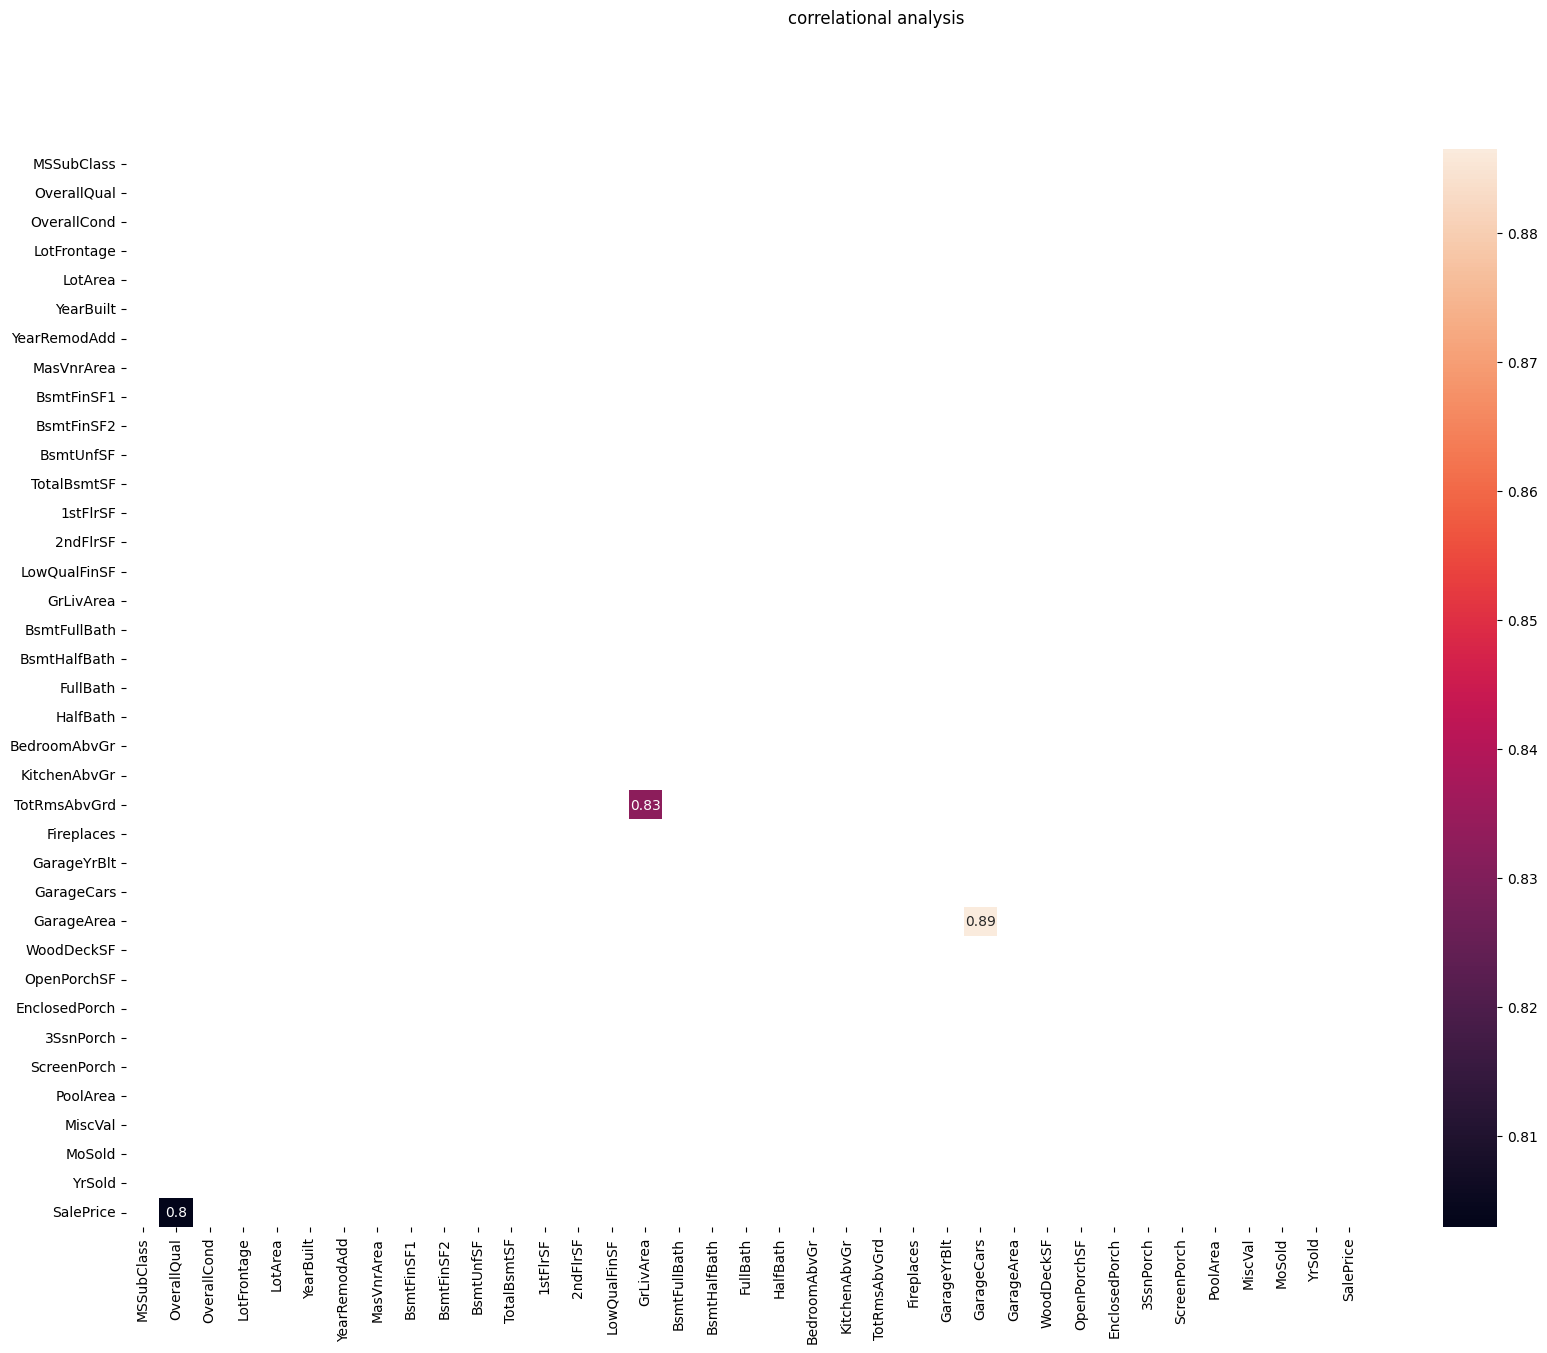

In [19]:
#correlation > 0.80 between independent features
plt.figure(figsize=(20,14))
sns.heatmap(housing.corr()[housing.corr()>0.8], annot=True, mask=np.triu(housing.corr()))
plt.suptitle('correlational analysis')
plt.show()

In [20]:
#highly correlated features
housing['TotRmsAbvGrd'].corr(housing['GrLivArea'])

0.8323405026527255

In [21]:
#highly correlated features
housing['GarageCars'].corr(housing['GarageArea'])

0.8864683051869662

In [22]:
#drop any one of highly correlated feature
housing.drop(columns = 'TotRmsAbvGrd', axis=1, inplace=True)
housing.drop(columns = 'GarageCars', axis=1, inplace=True)

In [23]:
housing[['YrSold', 'YearBuilt', 'GarageYrBlt', 'MoSold']]

,YrSold,YearBuilt,GarageYrBlt,MoSold
0,2008,2003,2003.0,2
1,2007,1976,1976.0,5
2,2008,2001,2001.0,9
3,2006,1915,1998.0,2
4,2008,2000,2000.0,12
...,...,...,...,...
1455,2007,1999,1999.0,8
1456,2010,1978,1978.0,2
1457,2010,1941,1941.0,5
1458,2010,1950,1950.0,4


<AxesSubplot: xlabel='MoSold', ylabel='SalePrice'>

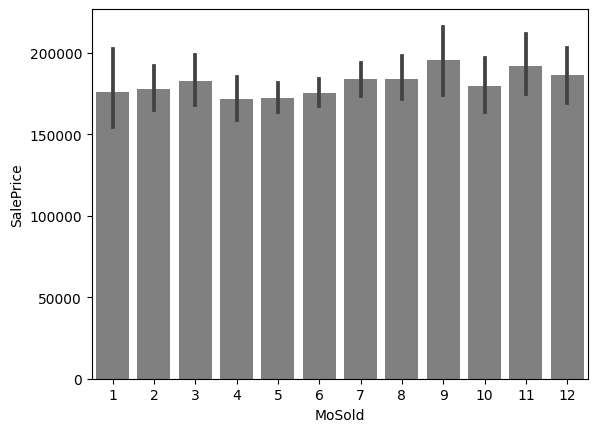

In [24]:
sns.barplot(x = 'MoSold', y = 'SalePrice', data=housing, color='grey')

In [25]:
#check difference in yearbuilt and yearsold to consolidate dataframe
housing['YrDiff'] = housing['YrSold'] - housing['YearBuilt']
housing = housing.drop(['YrSold', 'YearBuilt', 'GarageYrBlt', 'MoSold'], axis=1)

In [26]:
#Correlation with SalePrice
housing.corr()[['SalePrice']].sort_values('SalePrice', ascending = False)

,SalePrice
SalePrice,1.000000
OverallQual,0.802916
GrLivArea,0.722363
TotalBsmtSF,0.642995
GarageArea,0.638808
1stFlrSF,0.621569
FullBath,0.557877
YearRemodAdd,0.523309
MasVnrArea,0.474530
Fireplaces,0.462305


In [27]:
#dropping columns that are not significantly correlated with target variable
housing = housing.drop(['PoolArea', '3SsnPorch', 'BsmtFinSF2', 'MiscVal', 'LowQualFinSF', 'BsmtHalfBath'], axis=1)

### 4. Data preparation for modeling

count      1450.000000
mean     179915.824828
std       76473.141581
min       34900.000000
25%      129900.000000
50%      162900.000000
75%      213497.500000
max      625000.000000
Name: SalePrice, dtype: float64


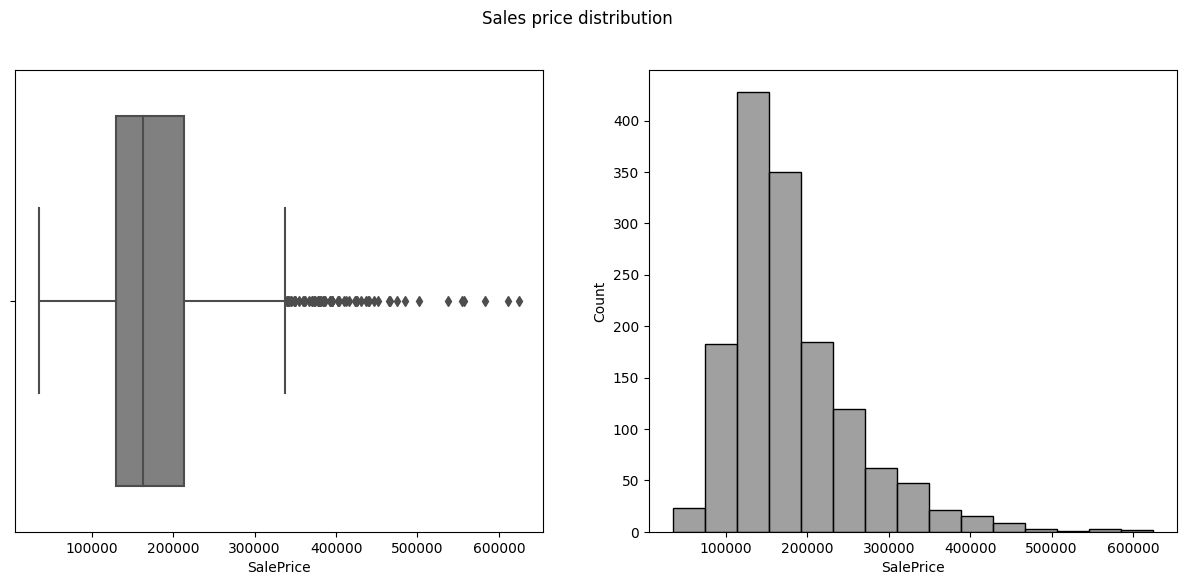

In [28]:
#target variable analysis

print(housing.SalePrice.describe())

#boxplot Sales price
fig, ax = plt.subplots(1,2, figsize=(15, 6))
sns.boxplot(data=housing, x='SalePrice', ax=ax[0], color='grey')
sns.histplot(data=housing, x ='SalePrice', bins=15, ax=ax[1], color='grey')
plt.suptitle("Sales price distribution")
plt.show()

In [29]:
#Since the target variable is highly skewed, perform Log transform before train test split
housing['SalePrice'] = np.log(housing['SalePrice'])

In [30]:
#numeric columns
housing_numeric = housing.select_dtypes(include=['int64', 'float64'])
num_col = list(housing_numeric.columns)
print(num_col)

['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'YrDiff']


In [31]:
#categorical columns
housing_objects = housing.select_dtypes(include=['object'])
cat_col = list(housing_objects.columns)
print(cat_col)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [32]:
y = housing['SalePrice']
X = housing.drop('SalePrice', axis=1)

In [33]:
#dummies for categorical variables
housing_dummies = pd.get_dummies(housing_objects, drop_first=True)

In [34]:
# drop categorical variables since we've created dummies
X = X.drop(housing_objects.columns, axis=1)

# concat dummy variables with X
X = pd.concat([X, housing_dummies], axis=1)

In [35]:
#scaling the numerical variables

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#dataframe
X = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

In [36]:
X.shape

(1450, 248)

In [37]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=1)

### 5. Model Building

#### Linear Regression (using statsmodel)

In [38]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error

X_train_sm = sm.add_constant(X_train, has_constant='add')
X_test_sm = sm.add_constant(X_test, has_constant='add')

# basic model without feature selection
lr = sm.OLS(y_train, X_train_sm).fit()
#print(lr.summary())

In [39]:
y_train_pred_lr1 = lr.predict(X_train_sm)
y_test_pred_lr1 = lr.predict(X_test_sm)

r2_train_lr1 = r2_score(y_train, y_train_pred_lr1)
r2_test_lr1 = r2_score(y_test, y_test_pred_lr1)

mse_test_lr1 = mean_squared_error(y_test, y_test_pred_lr1)
rmse_test_lr1 = mse_test_lr1**0.5

print(f' r-squared train: {r2_train_lr1} \n r-squared test: {r2_test_lr1}\n root mean squared error: {rmse_test_lr1}')

 r-squared train: 0.9509884078028851 
 r-squared test: -10.209618769725498
 root mean squared error: 1.2706408485754053


In [40]:
# Recursive feature elimination to select half features out of 252 features

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train_sm,y_train)

rfe = RFE(lm)
rfe = rfe.fit(X_train_sm, y_train)

In [41]:
#del_col = X_train.columns[~rfe.support_] # to drop columns from test dataset

col = X_train_sm.columns[rfe.support_]

#apply changes to both train and validation data
X_train_sm = X_train_sm[col]
X_test_sm = X_test_sm[col]

print(X_train_sm.shape)
print(X_test_sm.shape)

(1160, 124)
(290, 124)


In [42]:
X_train_rfe = sm.add_constant(X_train_sm, has_constant='add')
X_test_rfe = sm.add_constant(X_test_sm, has_constant='add')

In [43]:
lr2 = sm.OLS(y_train, X_train_rfe).fit()

In [44]:
y_train_pred_lr2 = lr2.predict(X_train_rfe)
y_test_pred_lr2 = lr2.predict(X_test_rfe)

r2_train_lr2 = r2_score(y_train, y_train_pred_lr2)
r2_test_lr2 = r2_score(y_test, y_test_pred_lr2)

mse_test_lr2 = mean_squared_error(y_test, y_test_pred_lr2)
rmse_test_lr2 = mse_test_lr2**0.5

print(f' r-squared train: {r2_train_lr2} \n r-squared test: {r2_test_lr2}\n root mean squared error: {rmse_test_lr2}')

 r-squared train: 0.9465951150248307 
 r-squared test: -1.9467178322258163
 root mean squared error: 0.651473368802626


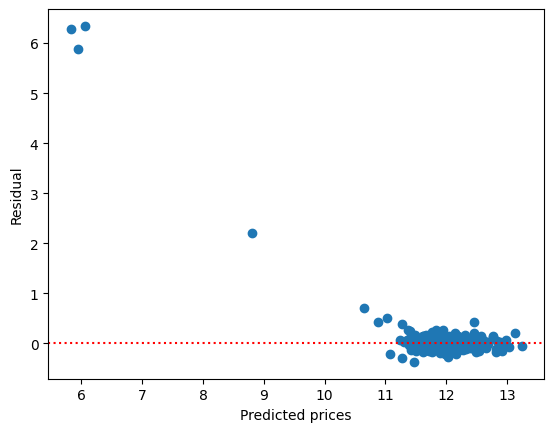

In [45]:
#residual errors
residual = y_test - y_test_pred_lr2

# Scatter plot of the predicted values on the x-axis and the residuals on the y-axis
plt.scatter(y_test_pred_lr2 , residual)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted prices")
plt.ylabel("Residual")
plt.show()

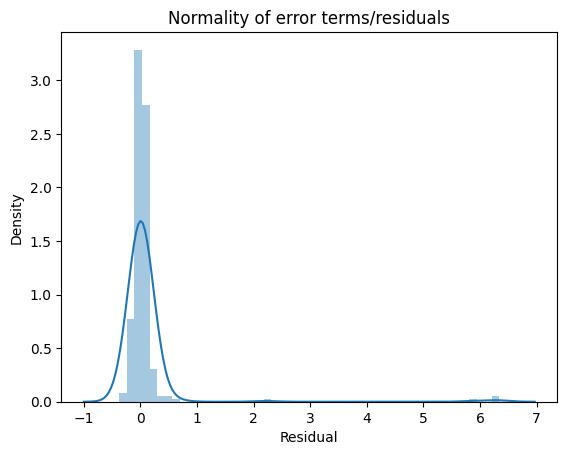

In [46]:
# Distribution of errors
p = sns.distplot(residual,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual")
plt.show()

#### Linear regression with polynomial transformation

In [47]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(X)

In [48]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(poly_features, y,
                                                                        test_size=0.2, random_state=1)

In [49]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, y_train_poly)

y_train_pred = poly_reg_model.predict(X_train_poly)
y_test_pred = poly_reg_model.predict(X_test_poly)

poly_r2_train = r2_score(y_train_poly, y_train_pred)
poly_r2_test = r2_score(y_test_poly, y_test_pred)

poly_mse_test = mean_squared_error(y_test_poly, y_test_pred)
poly_rmse_test = poly_mse_test**0.5

print(f' r-squared train: {poly_r2_train} \n r-squared test: {poly_r2_test}\n root mean squared error: {poly_rmse_test}')

 r-squared train: 0.9999914038444127 
 r-squared test: -4.99676276090134e+16
 root mean squared error: 84834353.90836233


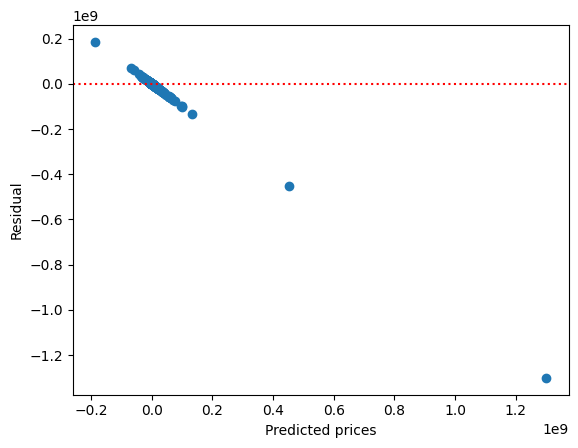

In [50]:
#residual errors
residual = y_test_poly - y_test_pred

# Scatter plot of the predicted values on the x-axis and the residuals on the y-axis
plt.scatter(y_test_pred , residual)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted prices")
plt.ylabel("Residual")
plt.show()

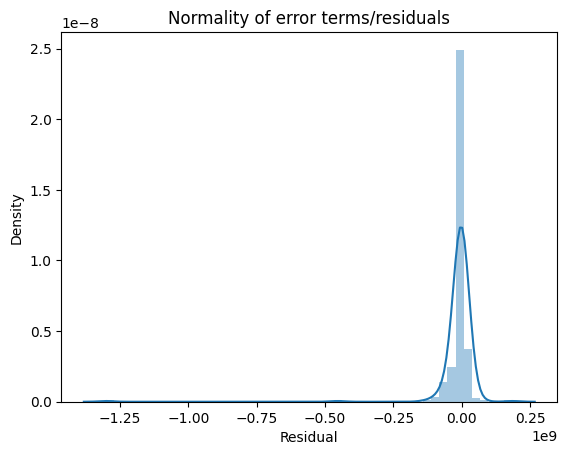

In [51]:
# Distribution of errors
p = sns.distplot(residual,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual")
plt.show()

#### Ridge Regression

In [52]:
#since Ridge decreases coefficient and Lasso does feature selection, I'll do train test split again to start from beginning
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=1)

In [53]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

from sklearn.linear_model import Ridge, Lasso

ridge = Ridge()

# cross validation
folds = 5

model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [54]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [55]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=100)

In [56]:
y_train_pred_rg = ridge.predict(X_train)
y_test_pred_rg = ridge.predict(X_test)

r2_train_rg = r2_score(y_train, y_train_pred_rg)
r2_test_rg = r2_score(y_test, y_test_pred_rg)

mse_test_rg = mean_squared_error(y_test, y_test_pred_rg)
rmse_test_rg = mse_test_rg**0.5

print(f' r-squared train: {r2_train_rg} \n r-squared test: {r2_test_rg}\n root mean squared error: {rmse_test_rg}')

 r-squared train: 0.9423897174454078 
 r-squared test: 0.9198246462114905
 root mean squared error: 0.10746024688728607


#### Lasso Regression

In [57]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [58]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [59]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [60]:
y_train_pred_ls = lasso.predict(X_train)
y_test_pred_ls = lasso.predict(X_test)

r2_train_ls = r2_score(y_train, y_train_pred_ls)
r2_test_ls = r2_score(y_test, y_test_pred_ls)

mse_test_ls = mean_squared_error(y_test, y_test_pred_ls)
rmse_test_ls = mse_test_ls**0.5

print(f' r-squared train: {r2_train_ls} \n r-squared test: {r2_test_ls}\n root mean squared error: {rmse_test_ls}')

 r-squared train: 0.9455588215883084 
 r-squared test: 0.9158107399401567
 root mean squared error: 0.1101173465317255


In [61]:
print("Number of features used(Lasso):", np.sum(ridge.coef_!=0))
print("Number of features used(Lasso):", np.sum(lasso.coef_!=0))

Number of features used(Lasso): 248
Number of features used(Lasso): 164


In [62]:
compare = pd.DataFrame([[r2_train_lr1, r2_test_lr1, rmse_test_lr1], [r2_train_lr2, r2_test_lr2, rmse_test_lr2], 
            [poly_r2_train, poly_r2_test, poly_rmse_test], [r2_train_rg, r2_test_rg, rmse_test_rg], 
            [r2_train_ls, r2_test_ls, rmse_test_ls]],
            columns = ['Train R2 score', 'Test R2 score', 'RMSE'], 
            index = ['Linear Regression (base)', 'Linear Regression (RFE)', 
                     'Linear Regression (Polynomial)', 'Ridge Regression', 'Lasso Regression'])

compare

,Train R2 score,Test R2 score,RMSE
Linear Regression (base),0.950988,-1.020962e+01,1.270641e+00
Linear Regression (RFE),0.946595,-1.946718e+00,6.514734e-01
Linear Regression (Polynomial),0.999991,-4.996763e+16,8.483435e+07
Ridge Regression,0.942390,9.198246e-01,1.074602e-01
Lasso Regression,0.945559,9.158107e-01,1.101173e-01


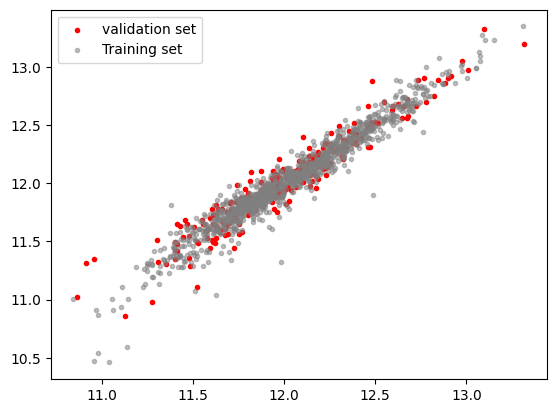

In [68]:
# Plot the linear model
plt.scatter(y_test_pred_rg, y_test, color='red', marker='.', label = "validation set")
plt.scatter(y_train_pred_rg, y_train, color='grey', marker='.', label = "Training set", alpha=0.5)
plt.legend()
plt.show()

### Top 10 important features

In [69]:
a = pd.DataFrame(X_train.columns)
b = pd.DataFrame(ridge.coef_)

In [70]:
coefficients = pd.concat([a,b], axis=1)
coefficients.columns = ['Features','Coefficient']

In [71]:
coefficients.sort_values(by='Coefficient', ascending=False).head(10)

,Features,Coefficient
12,GrLivArea,0.059387
1,OverallQual,0.053578
10,1stFlrSF,0.043126
9,TotalBsmtSF,0.038409
2,OverallCond,0.036185
11,2ndFlrSF,0.029444
19,GarageArea,0.027710
27,MSZoning_RL,0.027653
4,LotArea,0.025752
7,BsmtFinSF1,0.022943


## Question 3:
#### Remove top 5 features and find next 5 top features


In [73]:
X_train_new = X_train.drop(columns = ['GrLivArea', 'OverallQual', '1stFlrSF', 'TotalBsmtSF', 'OverallCond'], axis=1)

In [74]:
X_test_new = X_test.drop(columns = ['GrLivArea', 'OverallQual', '1stFlrSF', 'TotalBsmtSF', 'OverallCond'], axis=1)

In [75]:
ridge_new = Ridge()

# cross validation
model_cv_new = GridSearchCV(estimator = ridge_new, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_new.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [76]:
print(model_cv_new.best_params_)

{'alpha': 100}


In [77]:
alpha =100

ridge_new = Ridge(alpha=alpha)
        
ridge_new.fit(X_train_new, y_train) 

Ridge(alpha=100)

In [78]:
y_train_pred_ls = ridge_new.predict(X_train_new)
y_test_pred_ls = ridge_new.predict(X_test_new)

r2_train_ls = r2_score(y_train, y_train_pred_ls)
r2_test_ls = r2_score(y_test, y_test_pred_ls)

mse_test_ls = mean_squared_error(y_test, y_test_pred_ls)
rmse_test_ls = mse_test_ls**0.5

print(f' r-squared train: {r2_train_ls} \n r-squared test: {r2_test_ls}\n root mean squared error: {rmse_test_ls}')

 r-squared train: 0.9193599284905076 
 r-squared test: 0.8872321500350134
 root mean squared error: 0.12744419007170402


In [79]:
c = pd.DataFrame(X_train_new.columns)
d = pd.DataFrame(ridge_new.coef_)

In [80]:
coefficients = pd.concat([c,d], axis=1)
coefficients.columns = ['Features','Coefficient']

coefficients.sort_values(by='Coefficient', ascending=False)

,Features,Coefficient
5,BsmtFinSF1,0.064823
6,BsmtUnfSF,0.053967
14,GarageArea,0.045039
7,2ndFlrSF,0.044560
9,FullBath,0.037988
...,...,...
48,Neighborhood_IDOTRR,-0.022645
148,BsmtQual_TA,-0.022818
185,KitchenQual_Gd,-0.024400
49,Neighborhood_MeadowV,-0.024793
